In [13]:
from runprog import run_strategy, run_pairs_strategy
from strategies import SMAStrategy, RSIStrategy, StochStrategy, PairsTradingStrategy
import datetime as dt
import yfinance as yf

In [14]:
# # Download historical data for TSLA
ticker = "TSLA"
start_date = dt.datetime(2010, 10, 1)
end_date = dt.datetime(2022, 1, 1)
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [15]:
# # Save data to CSV to use with PyAlgoTrade
csv_file = 'STOCK_data.csv'  # Adjust path as needed
data.to_csv(csv_file)

In [16]:
#Second ticker for Pairs trading stock 
tickerA = "AAPL"
tickerB = "MSFT"
start = dt.date(2015, 1, 1)
end = dt.date(2022, 1, 1)
yf.download(tickerA, start=start, end=end).to_csv(tickerA + "_data.csv")
yf.download(tickerB, start=start, end=end).to_csv(tickerB + "_data.csv")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [17]:
# Parameters for each strategy
initial_cash = 10000000
fast_ma_period = 50
slow_ma_period = 200
rsi_period = 14
fastKPeriod = 14   
slowDPeriod = 3 
windowSize = 10 # high frequency should be low like 5,10 , 15 - longer term strategies should be 20, 50 , 100, 200 
num_std_dev = 2

2012-01-17 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill TSLA order [5] for 8147504 share/s


-------------------------------------
SMA STATISTICS
Final portfolio value: $687821166.85
Cumulative returns: 6778.21 %
Sharpe ratio: 0.95
Max. drawdown: 59.19 %
Longest drawdown duration: 1957 days, 0:00:00

Total trades: 0


2013-08-08 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill TSLA order [61] for 1321089 share/s
2018-10-01 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill TSLA order [168] for 690624 share/s


-------------------------------------
RSI STATISTICS
Final portfolio value: $64351705.52
Cumulative returns: 543.52 %
Sharpe ratio: 0.54
Max. drawdown: 49.95 %
Longest drawdown duration: 746 days, 0:00:00

Total trades: 10
Avg. profit: $5435171
Profits std. dev.: $7844532
Max. profit: $24217599
Min. profit: $-2137187
Avg. return: 27 %
Returns std. dev.: 33 %
Max. return: 114 %
Min. return: -9 %

Profitable trades: 9
Avg. profit: $6276544
Profits std. dev.: $7829113
Max. profit: $24217599
Min. profit: $428274
Avg. return: 31 %
Returns std. dev.: 32 %
Max. return: 114 %
Min. return:  2 %

Unprofitable trades: 1
Avg. loss: $-2137187
Losses std. dev.: $ 0
Max. loss: $-2137187
Min. loss: $-2137187
Avg. return: -9 %
Returns std. dev.:  0 %
Max. return: -9 %
Min. return: -9 %
-------------------------------------
OS STATISTICS
Final portfolio value: $1505996714.29
Cumulative returns: 14959.97 %
Sharpe ratio: 1.05
Max. drawdown: 59.88 %
Longest drawdown duration: 939 days, 0:00:00

Total trade

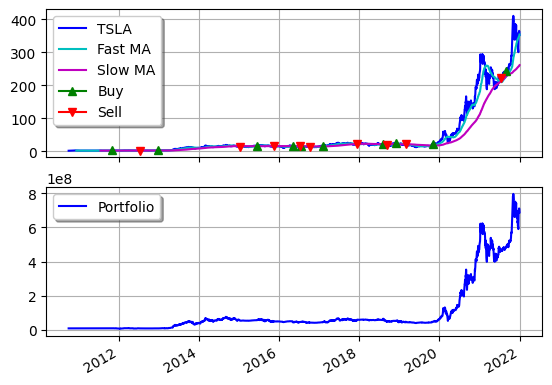

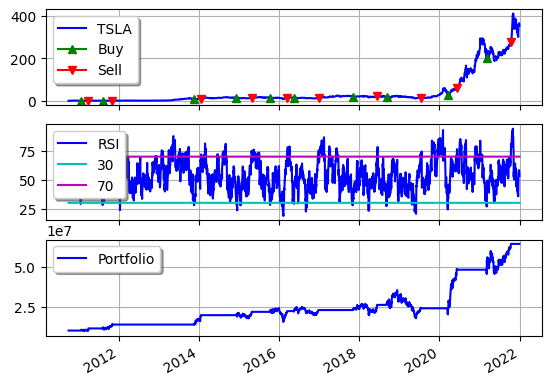

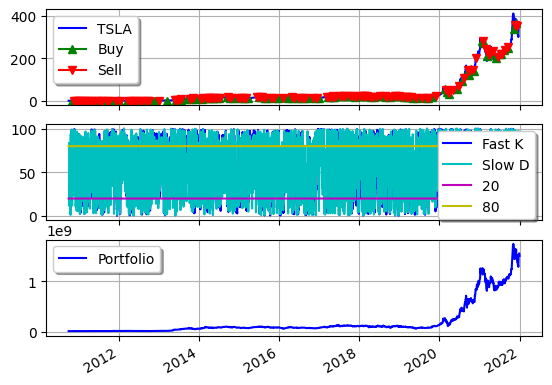

In [18]:
#Run three seperate strategies 
run_strategy(SMAStrategy, csv_file, ticker, initial_cash, fast_ma_period, slow_ma_period, ticker)
run_strategy(RSIStrategy, csv_file, ticker, initial_cash, rsi_period, ticker)
run_strategy(StochStrategy, csv_file, ticker, initial_cash, fastKPeriod, slowDPeriod, ticker)
#run_pairs_strategy (PairsTradingStrategy, tickerA, tickerB, initial_cash, windowSize, num_std_dev)

In [19]:
#Put plots to html files and combine them into one html 
plot_html = f"<h2>SMA Plot</h2><img src='plot.png' style='width:35%;'>"
plot2_html = f"<h2>RSI Plot</h2><img src='plot2.png' style='width:35%;'>"
plot3_html = f"<h2>OS Plot</h2><img src='plot3.png' style='width:35%;'>"
combined_html = f"<br>{plot_html}<br><br>{plot2_html}<br><br>{plot3_html}<br>"
    
# Save the combined HTML to a file
html_filename = 'combined_trade_signals.html'
with open(html_filename, 'w') as f:
    f.write(combined_html)